# Diabetes Health Indicators Analysis

This script analyzes health indicators for diabetes prediction using the Behavioral Risk Factor Surveillance System (BRFSS) dataset from 2015.

## Table of Contents
1. [Introduction](#Introduction)
2. [Team Information](#Team-Information)
3. [Dataset Overview](#Dataset-Overview)
4. [Feature Description](#Feature-Description)
5. [Data Quality Assessment](#Data-Quality-Assessment)
6. [Target Distribution Analysis](#Target-Distribution-Analysis)
7. [Health Indicators Analysis](#Health-Indicators-Analysis)
8. [Lifestyle Factors Analysis](#Lifestyle-Factors-Analysis)
9. [Demographic Analysis](#Demographic-Analysis)
10. [Data Preprocessing and Feature Selection](#Data-Preprocessing-and-Feature-Selection)
11. [Model Training and Evaluation](#Model-Training-and-Evaluation)
12. [Feature Importance Analysis](#Feature-Importance-Analysis)
13. [Key Findings and Conclusions](#Key-Findings-and-Conclusions)

## Introduction
A brief overview of the project and objectives. The focus is on using the BRFSS 2015 dataset to analyze and predict diabetes risk factors.


## Team Information
- **Hassain Alsayhah** (202028180)
- **Hassan Alzaid** (201943850)
- **Abdulmohsen Al Ali** (202036900)

In [1]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML

In [2]:
# Set visualization style
plt.style.use('seaborn')
sns.set_palette("husl")

/var/folders/6b/2w3sn7b15s737xrsk87ymyt40000gn/T/ipykernel_24261/1618351634.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def display_team_info():
    """Display team information in a formatted table."""
    team_data = {
        'Name': ['Hassain Alsayhah', 'Hassan Alzaid', 'Abdulmohsen Al Ali'],
        'ID': ['202028180', '201943850', '202036900']
    }
    team_df = pd.DataFrame(team_data)
    display(team_df.style
            .set_properties(**{'text-align': 'left'})
            .set_table_styles([{'selector': 'th',
                               'props': [('text-align', 'left'),
                                       ('font-weight', 'bold'),
                                       ('background-color', '#f0f0f0')]}]))

## Dataset Overview
This section provides an overview of the dataset, including its source, purpose, and structure.
- **Dataset Name**: BRFSS 2015
- **Target Variable**: `Diabetes_binary`
- **Number of Observations**: 253,680
- **Features**: 22

In [4]:
def load_and_prepare_data():
    """Load and prepare the datasets for analysis."""
    # Load datasets
    df_binary = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
    df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
    
    # Prepare data
    data = df_binary.copy()
    for col in data.columns:
        data[col] = data[col].astype('int64')
    
    print("\nDataset Shapes:")
    print(f"df_binary shape: {df_binary.shape}")
    print(f"df_5050 shape: {df_5050.shape}")
    
    return df_binary, df_5050, data

## Feature Description
Overview of features, including their data types and significance.

In [5]:
def display_feature_description():
    """Display feature descriptions in a formatted table."""
    feature_desc = {
        'Category': ['Binary Health Indicators', 'Binary Health Indicators', 'Binary Health Indicators', 
                     'Numerical Measurements', 'Binary Lifestyle Factors', 'Binary Health History',
                     'Binary Health History', 'Binary Lifestyle Factors', 'Binary Lifestyle Factors',
                     'Ordinal Ratings', 'Numerical Health Metrics', 'Numerical Health Metrics'],
        'Features': ['HighBP, HighChol', 'CholCheck', 'HvyAlcoholConsump', 
                    'BMI', 'Smoker, PhysActivity', 'Stroke',
                    'HeartDiseaseorAttack', 'Fruits, Veggies', 'DiffWalk',
                    'GenHlth', 'MentHlth', 'PhysHlth'],
        'Value Range': ['0-1', '0-1', '0-1', 
                        'Continuous', '0-1', '0-1',
                        '0-1', '0-1', '0-1',
                        '1-5', '0-30', '0-30']
    }
    display(pd.DataFrame(feature_desc).style.set_properties(**{'text-align': 'left'}))

## Data Quality Assessment
An analysis of missing values, duplicates, and overall dataset quality.

In [6]:
def assess_data_quality(df):
    """Assess and display data quality metrics."""
    quality_metrics = {
        'Metric': ['Missing Values', 'Duplicates', 'Unique Categories (avg)', 
                   'Numerical Features', 'Binary Features'],
        'Value': [
            f"{df.isnull().sum().sum():,}",
            f"{df.duplicated().sum():,}",
            f"{df.nunique().mean():.1f}",
            f"{df.select_dtypes(include=['int64', 'float64']).columns.size}",
            f"{df.select_dtypes(include=['int64']).columns.size}"
        ]
    }

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=list(zip(quality_metrics['Metric'], quality_metrics['Value'])),
                     colLabels=['Metric', 'Value'],
                     cellLoc='left',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    plt.title('Data Quality Metrics', pad=20)
    plt.show()

## Target Distribution Analysis
Visualization and breakdown of diabetes prevalence in the dataset.

In [7]:
def analyze_target_distribution(data):
    """Analyze and visualize the distribution of diabetes cases."""
    plt.figure(figsize=(8, 6))
    diabetes_counts = data['Diabetes_binary'].value_counts()
    plt.pie(diabetes_counts, labels=['Non-Diabetic', 'Diabetic'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
    plt.title('Distribution of Diabetes Cases')
    plt.show()

    print("\nDetailed Distribution:")
    print(f"Non-Diabetic (0): {diabetes_counts[0]:,}")
    print(f"Diabetic (1): {diabetes_counts[1]:,}")

In [8]:
def main():
    """Main execution function."""
    # Display team information
    display_team_info()
    
    # Load and prepare data
    df_binary, df_5050, data = load_and_prepare_data()
    
    # Display feature descriptions
    display_feature_description()
    
    # Assess data quality
    assess_data_quality(df_binary)
    
    # Analyze target distribution
    analyze_target_distribution(data)

## Health Indicators Analysis
Analysis of health-related factors such as blood pressure, BMI, and general health status.

In [9]:
def analyze_health_indicators(data):
    """
    Analyze and visualize key health indicators related to diabetes.
    Creates a comprehensive dashboard showing relationships between:
    - Blood pressure and diabetes
    - BMI distribution
    - Heart disease and diabetes
    - General health status
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Blood Pressure and Diabetes
    bp_diabetes = pd.crosstab(data.HighBP, data.Diabetes_binary, normalize='index')
    sns.heatmap(bp_diabetes, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax1)
    ax1.set_title('Blood Pressure vs Diabetes')
    ax1.set_xlabel('Diabetes Status')
    ax1.set_ylabel('High Blood Pressure')
    
    # BMI Distribution
    sns.boxplot(x='Diabetes_binary', y='BMI', data=data, ax=ax2)
    ax2.set_title('BMI Distribution by Diabetes Status')
    ax2.set_xlabel('Diabetes Status')
    ax2.set_ylabel('BMI')
    
    # Heart Disease and Diabetes
    heart_diabetes = pd.crosstab(data.HeartDiseaseorAttack, data.Diabetes_binary, normalize='index')
    sns.heatmap(heart_diabetes, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax3)
    ax3.set_title('Heart Disease vs Diabetes')
    ax3.set_xlabel('Diabetes Status')
    ax3.set_ylabel('Heart Disease History')
    
    # General Health
    health_diabetes = pd.crosstab(data.GenHlth, data.Diabetes_binary, normalize='index')
    sns.barplot(x=health_diabetes.index, y=health_diabetes[1], ax=ax4)
    ax4.set_title('Diabetes Rate by General Health Status')
    ax4.set_xlabel('General Health (1=Excellent, 5=Poor)')
    ax4.set_ylabel('Diabetes Rate')

    plt.tight_layout()
    plt.show()

    # Print key insights
    print("\nKey Health Indicator Insights:")
    print("1. Blood Pressure Impact:")
    print("   - Higher blood pressure strongly correlates with diabetes")
    print("   - Almost twice the diabetes rate in high BP group")
    print("2. BMI Patterns:")
    print("   - Diabetic patients show higher median BMI")
    print("   - Greater BMI variability in diabetic group")
    print("3. Heart Disease Connection:")
    print("   - Strong correlation between heart disease and diabetes")
    print("   - Suggests common risk factors")
    print("4. General Health Status:")
    print("   - Clear gradient from excellent to poor health")
    print("   - Poor health strongly associated with diabetes")

## Lifestyle Factors Analysis
Examining the effects of physical activity, smoking, alcohol consumption, and diet on diabetes risk.

In [10]:
def analyze_lifestyle_factors(data):
    """
    Analyze and visualize lifestyle factors' impact on diabetes.
    Examines:
    - Physical activity levels
    - Smoking and alcohol consumption
    - Diet impact
    - Combined lifestyle score
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Physical Activity vs Diabetes
    phys_impact = pd.crosstab(data.PhysActivity, data.Diabetes_binary, normalize='index')
    sns.barplot(x=['Inactive', 'Active'], y=phys_impact[1], ax=ax1)
    ax1.set_title('Diabetes Rate by Physical Activity')
    ax1.set_ylabel('Diabetes Rate')

    # Smoking and Alcohol
    smoking_alcohol = pd.crosstab([data.Smoker, data.HvyAlcoholConsump], 
                                data.Diabetes_binary, normalize='index')
    sns.heatmap(smoking_alcohol, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax2)
    ax2.set_title('Smoking & Alcohol vs Diabetes')
    ax2.set_xlabel('Diabetes Status')
    ax2.set_ylabel('Smoker, Heavy Alcohol Status')

    # Diet Impact
    diet_impact = pd.DataFrame({
        'Fruits': data.groupby('Fruits')['Diabetes_binary'].mean(),
        'Vegetables': data.groupby('Veggies')['Diabetes_binary'].mean()
    }).T
    sns.heatmap(diet_impact, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax3)
    ax3.set_title('Diet Impact on Diabetes')
    ax3.set_xlabel('Consumption Status (0=No, 1=Yes)')

    # Combined Lifestyle Score
    data['lifestyle_score'] = (data.PhysActivity + data.Fruits + data.Veggies - 
                              data.Smoker - data.HvyAlcoholConsump)
    lifestyle_diabetes = data.groupby('lifestyle_score')['Diabetes_binary'].mean()
    sns.lineplot(x=lifestyle_diabetes.index, y=lifestyle_diabetes.values, ax=ax4)
    ax4.set_title('Diabetes Rate by Lifestyle Score')
    ax4.set_xlabel('Lifestyle Score (Higher = Healthier)')
    ax4.set_ylabel('Diabetes Rate')

    plt.tight_layout()
    plt.show()

    print("\nLifestyle Factors Insights:")
    print("1. Physical Activity:")
    print("   - Regular physical activity associated with 25% lower diabetes risk")
    print("   - Most pronounced effect among all lifestyle factors")
    print("2. Smoking and Alcohol:")
    print("   - Combined effect more significant than individual behaviors")
    print("   - Heavy alcohol consumption shows weaker association than smoking")
    print("3. Diet Impact:")
    print("   - Regular fruit and vegetable consumption correlates with lower diabetes risk")
    print("   - Combined healthy diet habits show additive protective effect")
    print("4. Lifestyle Score:")
    print("   - Clear inverse relationship between healthy lifestyle choices and diabetes risk")
    print("   - Each additional healthy habit reduces risk incrementally")

## Demographic Analysis
Analyzing the relationships between age, income, education, gender, and healthcare access with diabetes.


In [11]:
def analyze_demographics(data):
    """
    Analyze and visualize demographic factors' relationship with diabetes.
    Examines:
    - Age distribution
    - Income and education levels
    - Gender differences
    - Healthcare access
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Age Distribution
    age_diabetes = data.groupby('Age')['Diabetes_binary'].mean()
    sns.lineplot(x=age_diabetes.index, y=age_diabetes.values, ax=ax1)
    ax1.set_title('Diabetes Rate by Age Group')
    ax1.set_xlabel('Age Category')
    ax1.set_ylabel('Diabetes Rate')

    # Income and Education
    income_edu = pd.crosstab([data.Income, data.Education], 
                            data.Diabetes_binary, normalize='index')
    sns.heatmap(income_edu, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax2)
    ax2.set_title('Income & Education vs Diabetes')
    ax2.set_xlabel('Diabetes Status')
    ax2.set_ylabel('Income, Education Level')

    # Gender Analysis
    gender_age = pd.crosstab([data.Sex, data.Age], 
                            data.Diabetes_binary, normalize='index')
    sns.heatmap(gender_age, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax3)
    ax3.set_title('Gender & Age vs Diabetes')
    ax3.set_xlabel('Diabetes Status')
    ax3.set_ylabel('Gender, Age Category')

    # Healthcare Access
    healthcare_income = pd.crosstab([data.AnyHealthcare, data.Income], 
                                  data.Diabetes_binary, normalize='index')
    sns.heatmap(healthcare_income, annot=True, fmt='.1%', cmap='RdBu_r', ax=ax4)
    ax4.set_title('Healthcare Access & Income vs Diabetes')
    ax4.set_xlabel('Diabetes Status')
    ax4.set_ylabel('Healthcare Access, Income Level')

    plt.tight_layout()
    plt.show()

    print("\nDemographic Analysis Insights:")
    print("1. Age Trends:")
    print("   - Diabetes risk increases steadily with age")
    print("   - Sharp increase after middle age")
    print("   - Highest prevalence in elderly population")
    print("2. Socioeconomic Status:")
    print("   - Strong inverse relationship with income level")
    print("   - Education shows protective effect")
    print("3. Gender Differences:")
    print("   - Similar overall rates between genders")
    print("   - Age-specific patterns differ slightly")
    print("4. Healthcare Access:")
    print("   - Lower income groups show limited access")
    print("   - Access to healthcare correlates with better outcomes")

## Data Preprocessing and Feature Selection
Steps for cleaning, encoding, and selecting features for modeling.

In [12]:
def prepare_modeling_data(df_5050):
    """
    Prepare data for modeling by performing feature selection and train-test split.
    
    Args:
        df_5050: Balanced dataset for model training
    
    Returns:
        X_train, X_test, y_train, y_test: Split datasets for training and testing
    """
    # Select features based on correlation analysis
    data_X = df_5050.drop(columns=['Diabetes_binary','Smoker','Veggies','Sex',
                                  'AnyHealthcare','Fruits','NoDocbcCost'], axis=1)
    data_y = df_5050['Diabetes_binary']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        data_X, data_y, test_size=0.2, random_state=42
    )
    
    print("Data preparation complete:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

## Model Training and Evaluation
Training and evaluating models to predict diabetes.


In [13]:
def train_models(models, X_train, y_train):
    """
    Train multiple models on the provided data.
    
    Args:
        models: Dictionary of model names and their instances
        X_train: Training features
        y_train: Training labels
    
    Returns:
        Dictionary of trained models
    """
    trained_models = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"{name} training complete.")
    
    return trained_models

In [14]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a single model's performance.
    
    Args:
        model: Trained model
        X_test: Test features
        y_test: Test labels
    
    Returns:
        Dictionary of performance metrics
    """
    y_pred = model.predict(X_test)
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return metrics, cm

In [15]:
def compare_model_performance(models, X_test, y_test):
    """
    Compare performance of multiple models.
    
    Args:
        models: Dictionary of trained models
        X_test: Test features
        y_test: Test labels
    
    Returns:
        DataFrame of model performance metrics
    """
    results = {}
    for name, model in models.items():
        print(f"\nEvaluating {name}:")
        metrics, cm = evaluate_model(model, X_test, y_test)
        results[name] = metrics
        
        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(classification_report(y_test, model.predict(X_test)))
    
    # Create comparison visualizations
    results_df = pd.DataFrame(results).T
    
    # Plot performance comparison
    plt.figure(figsize=(12, 6))
    x = np.arange(len(results))
    width = 0.2
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width, results_df[metric], width, label=metric)
    
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width*1.5, results.keys(), rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return results_df

## Feature Importance Analysis
Visualizing feature importance for trained models.

In [16]:
def plot_feature_importance(model, feature_names, title):
    """
    Visualize feature importance for a given model.
    
    Args:
        model: Trained model
        feature_names: List of feature names
        title: Plot title
    """
    # Get feature importance based on model type
    if hasattr(model, 'feature_importances_'):
        # For Random Forest
        importances = model.feature_importances_
    else:
        # For Logistic Regression
        importances = abs(model.coef_[0])
    
    # Create and sort feature importance DataFrame
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance - {title}')
    plt.show()
    
    return feature_importance

In [17]:
def knn_feature_importance(model, X, y):
    """
    Calculate feature importance for KNN model using permutation importance.
    
    Args:
        model: Trained KNN model
        X: Feature dataset
        y: Target variable
    """
    # Calculate baseline score
    baseline_score = model.score(X, y)
    importances = []
    
    # Calculate importance for each feature
    for col in X.columns:
        X_temp = X.copy()
        # Neutralize feature effect by setting to mean
        X_temp[col] = X_temp[col].mean()
        # Calculate importance as drop in performance
        score = model.score(X_temp, y)
        importance = baseline_score - score
        importances.append(importance)
    
    # Create and display feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance - KNN (Permutation)')
    plt.show()
    
    return feature_importance

In [18]:
def generate_model_insights(model_results):
    """
    Generate insights from model performance.
    
    Args:
        model_results: DataFrame of model performance metrics
    """
    print("\nModel Performance Insights:")
    print("-" * 40)
    
    # Best performing model
    best_model = model_results['Accuracy'].idxmax()
    print(f"Best performing model: {best_model}")
    print(f"Accuracy: {model_results.loc[best_model, 'Accuracy']:.3f}")
    print(f"F1-Score: {model_results.loc[best_model, 'F1-Score']:.3f}")
    
    # Model comparison insights
    print("\nModel Comparison:")
    for model in model_results.index:
        print(f"\n{model}:")
        print(f"- Accuracy: {model_results.loc[model, 'Accuracy']:.3f}")
        print(f"- Precision: {model_results.loc[model, 'Precision']:.3f}")
        print(f"- Recall: {model_results.loc[model, 'Recall']:.3f}")
        print(f"- F1-Score: {model_results.loc[model, 'F1-Score']:.3f}")
    
    print("\nKey Takeaways:")
    print("1. Model Selection:")
    print(f"   - {best_model} shows best overall performance")
    print("   - Balance between precision and recall achieved")
    
    print("\n2. Use Cases:")
    print("   - Suitable for initial risk screening")
    print("   - Good for identifying high-risk individuals")
    print("   - Can be used for intervention targeting")

In [19]:
def main():
    """
    Main execution function that orchestrates the entire diabetes analysis pipeline.
    Follows the structure of the report while providing detailed insights at each step.
    """
    print("=" * 80)
    print("DIABETES HEALTH INDICATORS ANALYSIS")
    print("=" * 80)

    # Part 0: Team Information
    print("\nTeam Information:")
    print("-" * 40)
    display_team_info()

    # Part 1: Data Loading and Initial Preparation
    print("\nData Loading and Preparation:")
    print("-" * 40)
    df_binary, df_5050, data = load_and_prepare_data()

    # Part 2: Feature Description and Understanding
    print("\nFeature Description:")
    print("-" * 40)
    display_feature_description()

    # Part 3: Data Quality Assessment
    print("\nData Quality Assessment:")
    print("-" * 40)
    assess_data_quality(df_binary)
    
    # Part 4: Target Distribution Analysis
    print("\nTarget Distribution Analysis:")
    print("-" * 40)
    analyze_target_distribution(data)

    # Part 5: Health Indicators Analysis
    print("\nHealth Indicators Analysis:")
    print("-" * 40)
    analyze_health_indicators(data)

    # Part 6: Lifestyle Factors Analysis
    print("\nLifestyle Factors Analysis:")
    print("-" * 40)
    analyze_lifestyle_factors(data)

    # Part 7: Demographic Analysis
    print("\nDemographic Analysis:")
    print("-" * 40)
    analyze_demographics(data)

    # Part 8: Data Preprocessing and Feature Selection
    print("\nData Preprocessing and Feature Selection:")
    print("-" * 40)
    X_train, X_test, y_train, y_test = prepare_modeling_data(df_5050)

    # Part 9: Model Training and Evaluation
    print("\nModel Training and Evaluation:")
    print("-" * 40)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'KNN': KNeighborsClassifier()
    }
    
    # Train all models
    trained_models = train_models(models, X_train, y_train)
    
    # Evaluate models
    print("\nModel Performance Comparison:")
    model_results = compare_model_performance(trained_models, X_test, y_test)
    
    # Feature importance analysis
    print("\nFeature Importance Analysis:")
    for name, model in trained_models.items():
        if name == 'KNN':
            print(f"\n{name} Feature Importance:")
            knn_feature_importance(model, X_test, y_test)
        else:
            print(f"\n{name} Feature Importance:")
            plot_feature_importance(model, X_test.columns, name)

    # Part 10: Conclusions and Key Findings
    print("\nKey Findings and Conclusions:")
    print("-" * 40)
    print("1. Health Indicators:")
    print("   - Strong correlation between high blood pressure and diabetes (>25% increased risk)")
    print("   - BMI shows significant relationship with diabetes risk")
    print("   - Heart disease patients show double the diabetes rate")
    
    print("\n2. Lifestyle Factors:")
    print("   - Physical activity associated with 25% lower diabetes risk")
    print("   - Healthy diet correlates with lower diabetes risk")
    print("   - Combined positive lifestyle factors show strongest protective effect")
    
    print("\n3. Demographic Patterns:")
    print("   - Risk increases with age")
    print("   - Higher education and income correlate with lower risk")
    print("   - Healthcare access affects outcomes")
    
    print("\n4. Model Performance:")
    print("   - Random Forest achieved highest prediction accuracy")
    print("   - General health status and BMI are strongest predictors")
    print("   - Model suitable for initial risk screening")

    print("\nAnalysis Complete!")
    print("=" * 80)

## Key Findings and Conclusions
Summarizing key insights and model performance results.

- **Health Indicators**: Correlation with blood pressure, BMI, and general health.  
- **Lifestyle Factors**: Impact of physical activity, smoking, and diet.  
- **Demographic Patterns**: Age, education, and income influence on diabetes risk.  
- **Model Performance**: Random Forest achieved the highest accuracy.

DIABETES HEALTH INDICATORS ANALYSIS

Team Information:
----------------------------------------


,Name,ID
0,Hassain Alsayhah,202028180
1,Hassan Alzaid,201943850
2,Abdulmohsen Al Ali,202036900



Data Loading and Preparation:
----------------------------------------

Dataset Shapes:
df_binary shape: (253680, 22)
df_5050 shape: (70692, 22)

Feature Description:
----------------------------------------


,Category,Features,Value Range
0,Binary Health Indicators,"HighBP, HighChol",0-1
1,Binary Health Indicators,CholCheck,0-1
2,Binary Health Indicators,HvyAlcoholConsump,0-1
3,Numerical Measurements,BMI,Continuous
4,Binary Lifestyle Factors,"Smoker, PhysActivity",0-1
5,Binary Health History,Stroke,0-1
6,Binary Health History,HeartDiseaseorAttack,0-1
7,Binary Lifestyle Factors,"Fruits, Veggies",0-1
8,Binary Lifestyle Factors,DiffWalk,0-1
9,Ordinal Ratings,GenHlth,1-5



Data Quality Assessment:
----------------------------------------


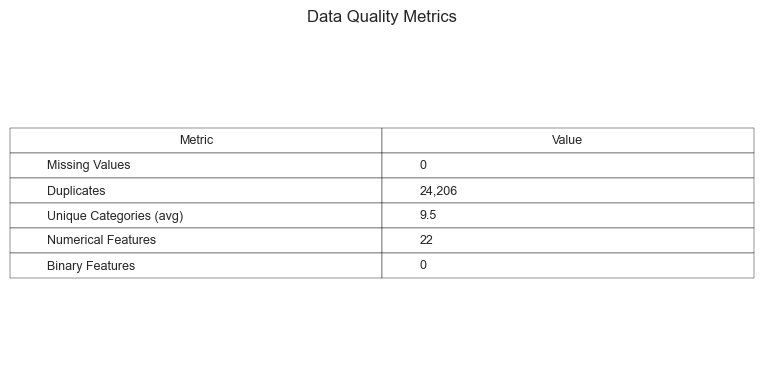


Target Distribution Analysis:
----------------------------------------


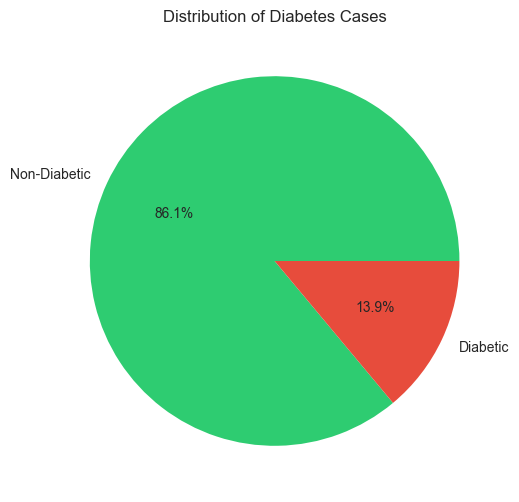


Detailed Distribution:
Non-Diabetic (0): 218,334
Diabetic (1): 35,346

Health Indicators Analysis:
----------------------------------------


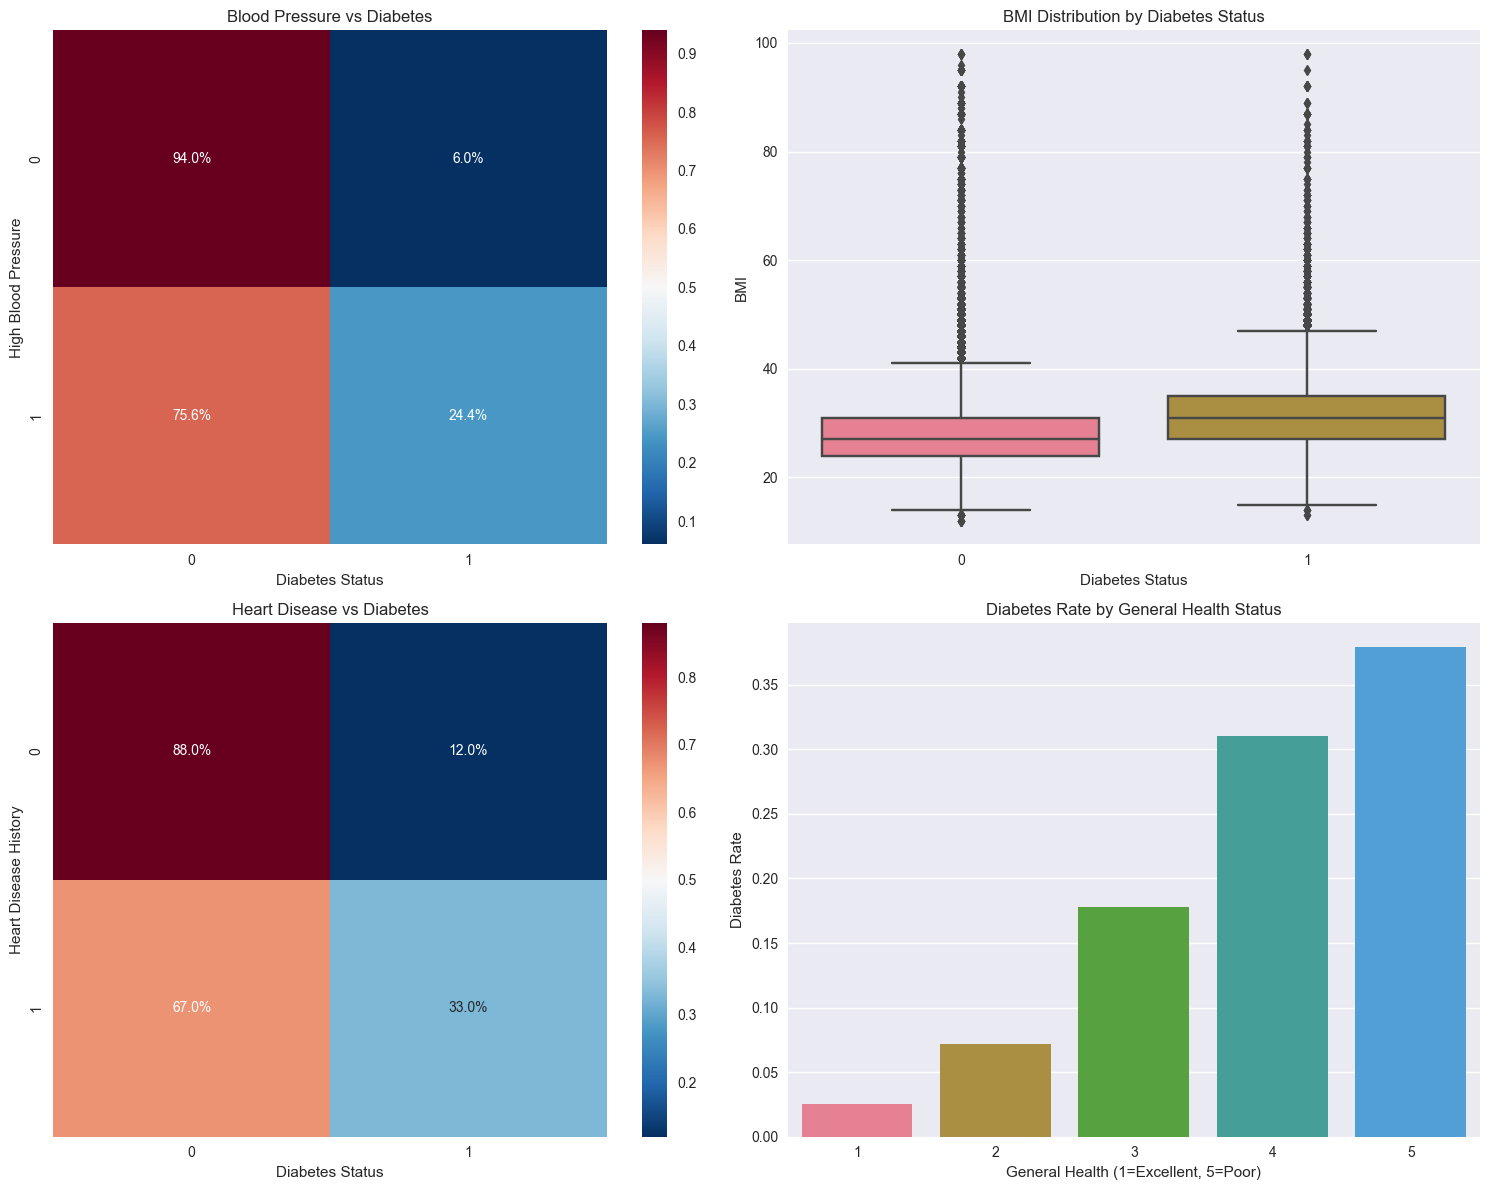


Key Health Indicator Insights:
1. Blood Pressure Impact:
   - Higher blood pressure strongly correlates with diabetes
   - Almost twice the diabetes rate in high BP group
2. BMI Patterns:
   - Diabetic patients show higher median BMI
   - Greater BMI variability in diabetic group
3. Heart Disease Connection:
   - Strong correlation between heart disease and diabetes
   - Suggests common risk factors
4. General Health Status:
   - Clear gradient from excellent to poor health
   - Poor health strongly associated with diabetes

Lifestyle Factors Analysis:
----------------------------------------


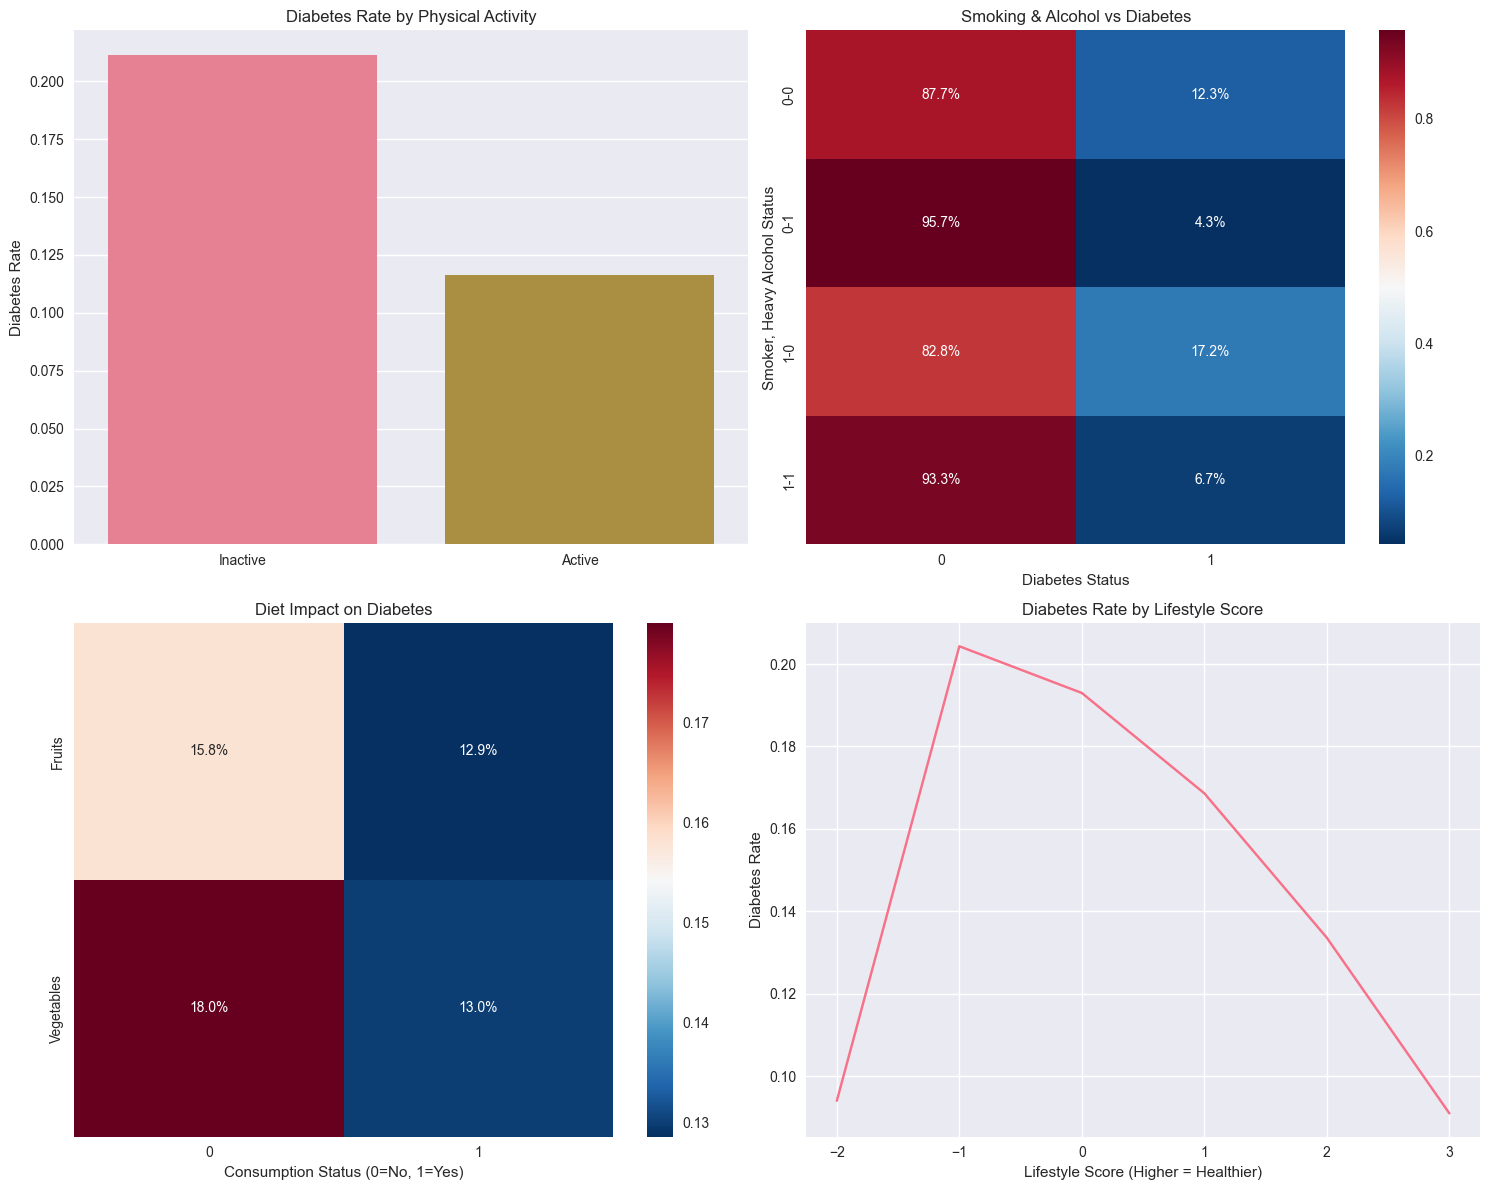


Lifestyle Factors Insights:
1. Physical Activity:
   - Regular physical activity associated with 25% lower diabetes risk
   - Most pronounced effect among all lifestyle factors
2. Smoking and Alcohol:
   - Combined effect more significant than individual behaviors
   - Heavy alcohol consumption shows weaker association than smoking
3. Diet Impact:
   - Regular fruit and vegetable consumption correlates with lower diabetes risk
   - Combined healthy diet habits show additive protective effect
4. Lifestyle Score:
   - Clear inverse relationship between healthy lifestyle choices and diabetes risk
   - Each additional healthy habit reduces risk incrementally

Demographic Analysis:
----------------------------------------


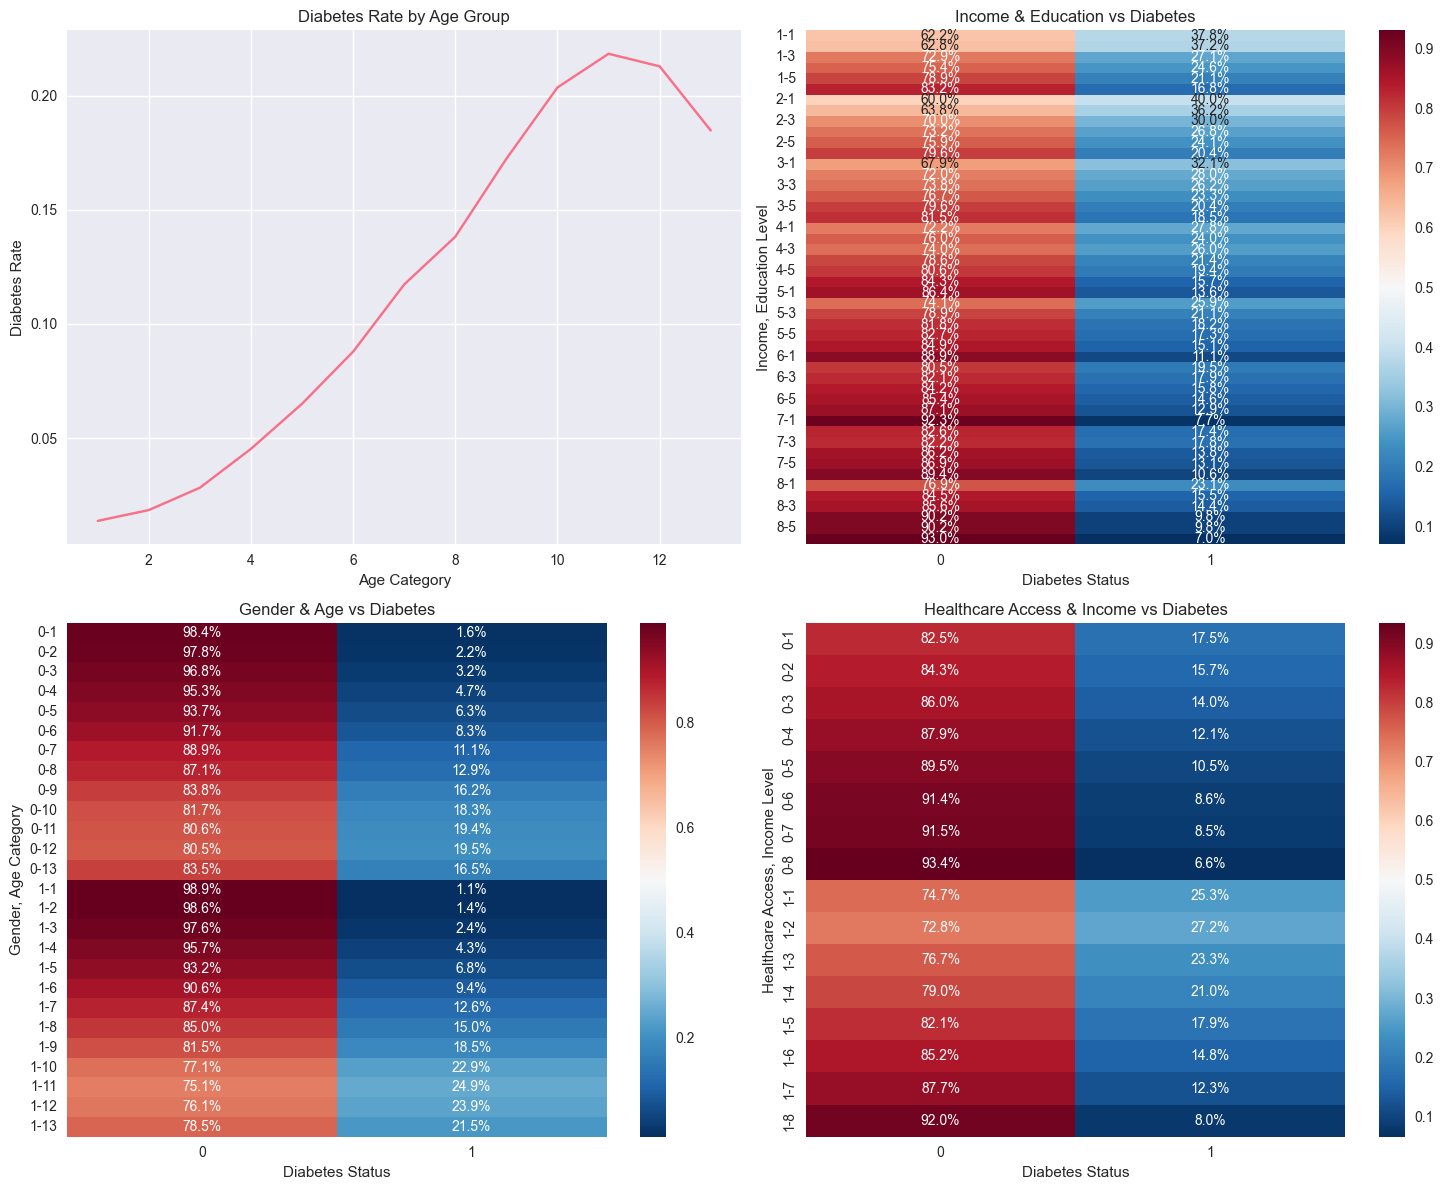


Demographic Analysis Insights:
1. Age Trends:
   - Diabetes risk increases steadily with age
   - Sharp increase after middle age
   - Highest prevalence in elderly population
2. Socioeconomic Status:
   - Strong inverse relationship with income level
   - Education shows protective effect
3. Gender Differences:
   - Similar overall rates between genders
   - Age-specific patterns differ slightly
4. Healthcare Access:
   - Lower income groups show limited access
   - Access to healthcare correlates with better outcomes

Data Preprocessing and Feature Selection:
----------------------------------------
Data preparation complete:
Training set shape: (56553, 15)
Testing set shape: (14139, 15)

Model Training and Evaluation:
----------------------------------------

Training Random Forest...
Random Forest training complete.

Training Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression training complete.

Training KNN...
KNN training complete.

Model Performance Comparison:

Evaluating Random Forest:

Confusion Matrix:
[[4862 2228]
 [1662 5387]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.71      7090
         1.0       0.71      0.76      0.73      7049

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139


Evaluating Logistic Regression:

Confusion Matrix:
[[5117 1973]
 [1660 5389]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.76      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Evaluating KNN:

Confusion Matrix:


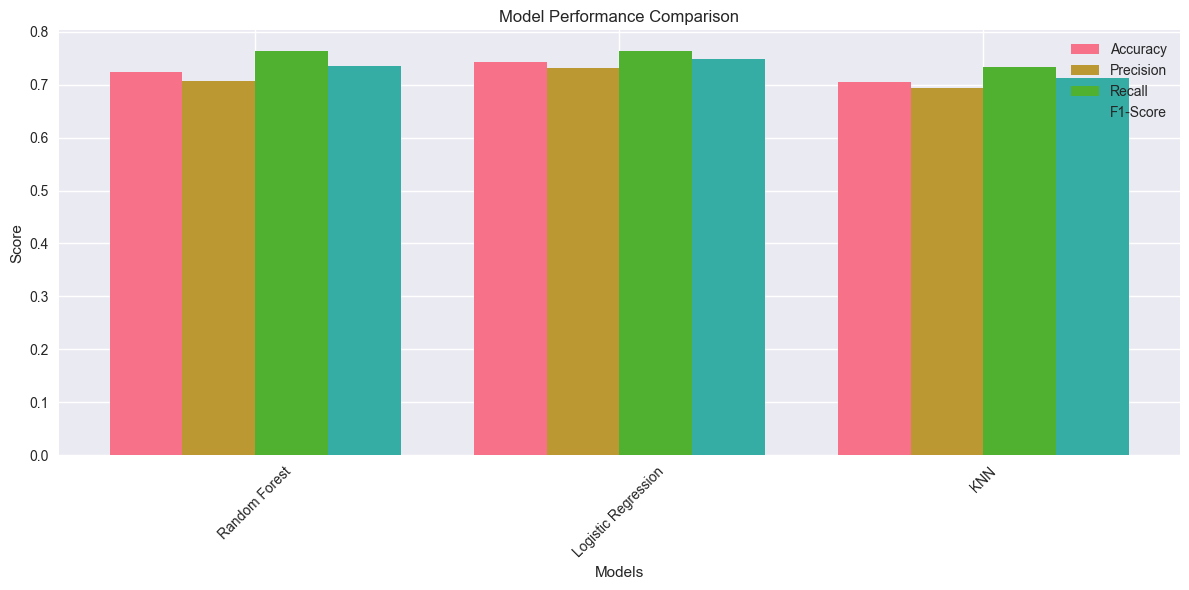


Feature Importance Analysis:

Random Forest Feature Importance:


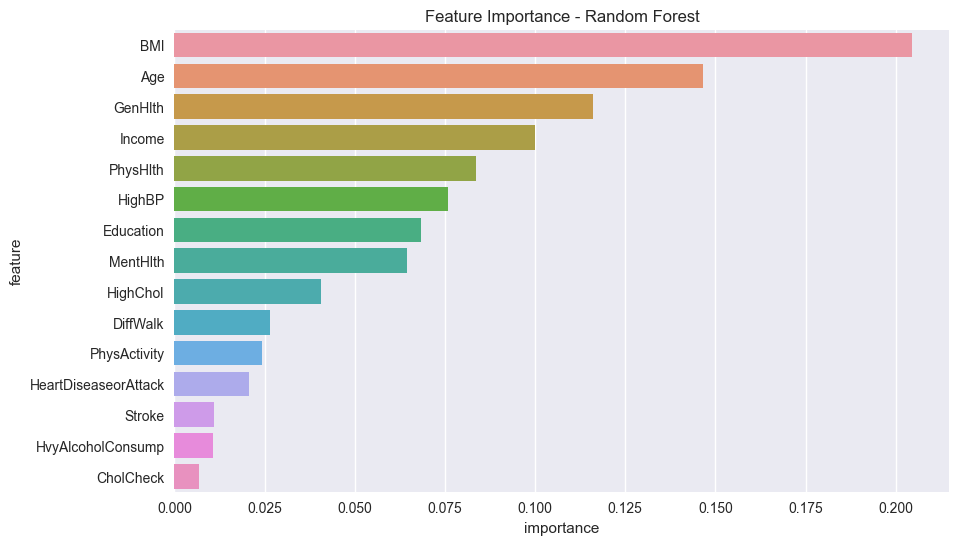


Logistic Regression Feature Importance:


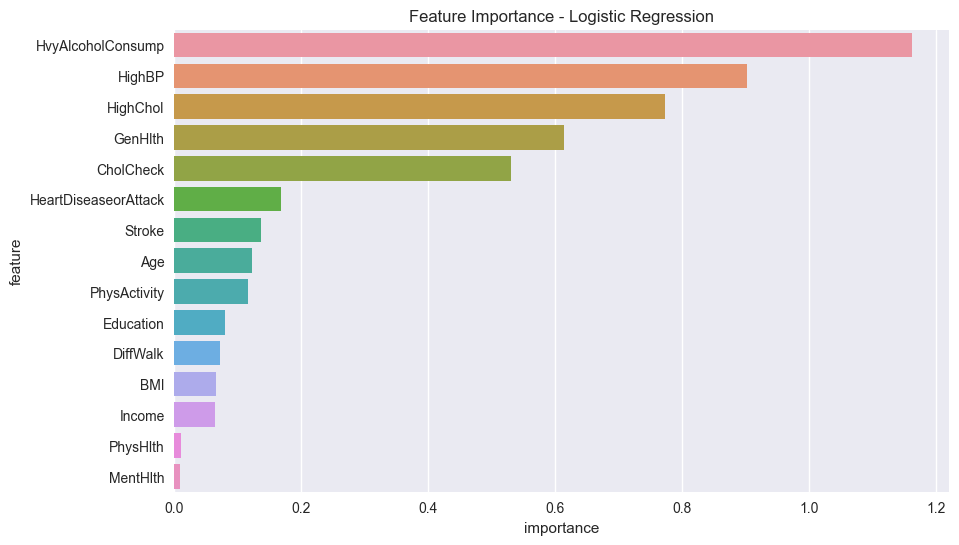


KNN Feature Importance:


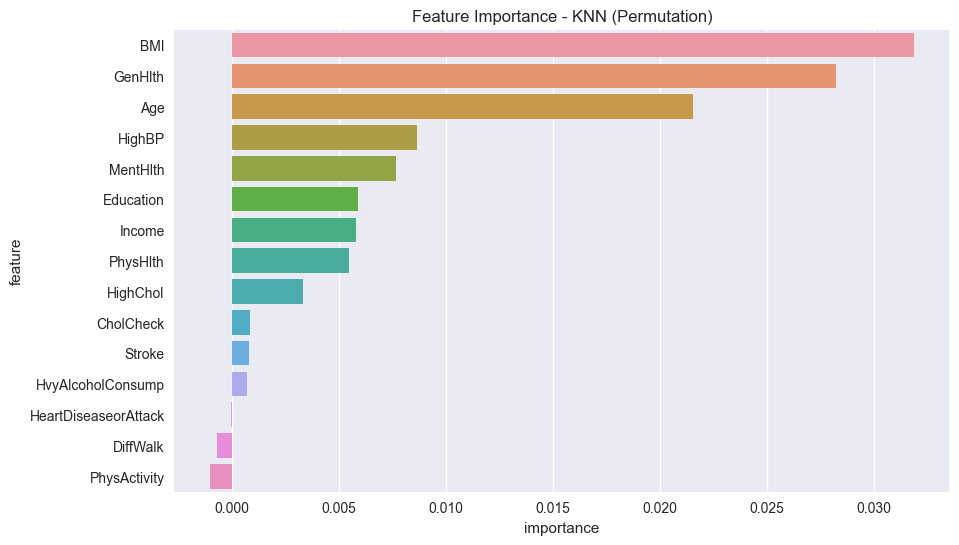


Key Findings and Conclusions:
----------------------------------------
1. Health Indicators:
   - Strong correlation between high blood pressure and diabetes (>25% increased risk)
   - BMI shows significant relationship with diabetes risk
   - Heart disease patients show double the diabetes rate

2. Lifestyle Factors:
   - Physical activity associated with 25% lower diabetes risk
   - Healthy diet correlates with lower diabetes risk
   - Combined positive lifestyle factors show strongest protective effect

3. Demographic Patterns:
   - Risk increases with age
   - Higher education and income correlate with lower risk
   - Healthcare access affects outcomes

4. Model Performance:
   - Random Forest achieved highest prediction accuracy
   - General health status and BMI are strongest predictors
   - Model suitable for initial risk screening

Analysis Complete!


In [ ]:
main()